## Percentage shift on Weather & Stock.

     - This Analysis is to find the Anual Percentage shift on Weather & Stock.
     - Analysed Weather (Temp) OIL, SOLAR, WIND company stock in order to find Annual Mean for all years.
     - Calculated Standard Deviation & Mean in order to find relation.
     - Performed The comparable analyses of the standard deviation of weather, oil, solar and wind.

#### Imported all required Packages 
    - Pandas
    - Numpy
    - Matplotlib
    - Seaborn
    - OS
    - Plotly Offline

In [1]:
import pandas as pd
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Offsetting the warning
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.plotly as py
import shutil

#### Data Processing
    - Read all required CSV file for weather, oil, wind, solar using pandas.
    - created seperate dataframes for seperate CSV.
    - As CSV contains dates so I parsed it while reading using parse_dates.

In [2]:
# Getting Current Working Directory
cwd = os.getcwd()

# Reading all required CSV's
cvx = pd.read_csv(cwd+"//final//data//stockData//CVX.csv", parse_dates=['Date'])
fslr = pd.read_csv(cwd+"//final//data//stockData//FSLR.csv", parse_dates=['Date'])
vws = pd.read_csv(cwd+"//final//extra//VWS.csv", parse_dates=['Date'])
vws['company_code'] = 'VWS'
weather = pd.read_csv(cwd+"//final//data//WeatherData//weather.csv", parse_dates=['Date'])

#### Merging CSV
    - Task is to merge all csv outerly on Date Column
    - Saving the final CSV in Analysis 2 Folder for final Analysis.

In [3]:
# Merging all csv's togeather
mergeSW = pd.merge(cvx, weather, how='outer', on='Date')
merge1 = pd.merge(mergeSW, fslr, how='outer', on='Date')
df = pd.merge(merge1, vws, how='outer', on='Date')
df.to_csv(cwd+"//final//extra//weatherStock.csv", index=False)

#### Filtering Data
    - As I have less data for 2017.
    - So, I filtered out the 2017 data from date column.

In [4]:
df = pd.read_csv(cwd+"//final//extra//weatherStock.csv", parse_dates=['Date'])
df = df.sort(['Date'], ascending=[1])
df = df[df.Date.dt.year != 2017]
df = df.dropna()

#### created function in order to save data in required directories

In [5]:
#function to check is directory exists
def funCheckDir(path):
    directory = os.path.dirname(path) # defining directory path
    if not os.path.exists(directory): # checking if directory already exists
        os.makedirs(directory) # making a directory

In [6]:
resultsPath = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 2//stockWeather.csv'
funCheckDir(resultsPath)

# Saving CSV for Analysis
df.to_csv(resultsPath, index=False)

#### This how the data from merge CSV looks like.
    - THE FOLLOWING COLUMNS ARE-
        - MAX Temp - Maximun Tempearture for the day.
        - OPEN - is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day),
        - HIGH - is the highest price of the stock on that trading day
        - LOW - the lowest price of the stock on that trading day, and close the price of the stock at closing time.
        - VOLUME - indicates how many stocks were traded. 
        - ADJ CLOSE - is the closing price of the stock that adjusts the price of the stock for corporate actions.

In [7]:
df = pd.read_csv(cwd+'\\final\\analysis\\ana_[1-3]//Analysis 2//stockWeather.csv', parse_dates=['Date'])
df = df.sort(['Date'], ascending=[1])
df.head(1)

,Date,company_code_x,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,...,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Open,High,Low,Close,Volume,Adj Close,company_code
0,2012-01-03,CVX,108.74,110.99,108.73,110.37,11518700.0,0.0,1.0,89.228418,...,34.7601,35.79,4438700.0,69.45,69.9,68.05,69.6,2605900.0,66.52,VWS


#### Now Finding a mean for each company stock & weater with related to past dates.
    - USED MEAN function from pandas.

In [8]:
# Calculating Mean for each year in order to plot
dfMeanYear = df.groupby([df.Date.dt.year]).mean()
dfMeanYear = dfMeanYear.reset_index()
dfMeanYear.head()

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Open,High,Low,Close,Volume,Adj Close
0,2012,107.520480,108.259312,106.733375,107.552106,6.491130e+06,0.014040,1.0,89.711420,90.327807,...,25.141080,23.711366,24.339344,6.071357e+06,41.602080,42.519520,40.414520,41.332720,2.986178e+06,39.506400
1,2013,120.181295,120.864837,119.449110,120.214625,5.719474e+06,0.015538,1.0,103.653307,104.242726,...,44.067903,42.076196,43.012023,5.637390e+06,91.961793,93.722908,90.256414,91.975817,2.403818e+06,87.912311
2,2014,120.550575,121.310721,119.660554,120.513651,6.529323e+06,0.016706,1.0,107.535776,108.215092,...,61.349471,59.104154,60.176702,3.344717e+06,229.689683,233.047619,225.465079,229.085714,2.565102e+06,218.964484
3,2015,96.378452,97.306379,95.392833,96.362579,9.248215e+06,0.016984,1.0,89.254428,90.116736,...,53.263433,51.501807,52.382381,2.380509e+06,344.663492,348.623016,340.403571,344.638095,1.674890e+06,333.070675
4,2016,99.757579,100.677525,98.866806,99.873651,8.054697e+06,0.017024,1.0,96.905301,97.795817,...,50.057976,48.223058,49.048274,2.773531e+06,471.535317,476.378968,465.685714,470.562698,1.057995e+06,461.092857


### Now we can compare the mean of stocks & weather and infer some information.

In [10]:
weather = go.Bar(
    x=dfMeanYear.Date,
    y=dfMeanYear['Max Temp'] * 10,
    name='Weather'
)
cvxStock = go.Bar(
    x=dfMeanYear.Date,
    y=dfMeanYear['Adj. Close_x'],
    name='OIL'
)

fslrStock = go.Bar(
    x=dfMeanYear.Date,
    y=dfMeanYear['Adj. Close_y'],
    name='SOLAR'
)

vwsStock = go.Bar(
    x=dfMeanYear.Date,
    y=dfMeanYear['Adj Close'],
    name='WIND'
)

data = [weather, fslrStock, cvxStock, vwsStock]
layout = go.Layout(
    barmode='group',
    title = "Annual Mean Weather VS Stock"
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig, 'Mean.png')
iplot(fig, filename='grouped-bar')

#moving saved file
shutil.move(cwd+"//Mean.png", cwd+"//final//analysis//ana_[1-3]//Analysis 1//Mean.png")

'C:\\Users\\rohit//final//analysis//ana_[1-3]//Analysis 1//Mean.png'

### Result from above graph.

- The above plot describes the comparative study of annual means of stock situation of renewable and non- renewable energy companies gainst the annual means of temperatures. 
    
- The scale of weather means has been increased 100 times to provide a consistent visualization of accumulated data.

- The study shows a stagnancy in the rise of non-renewable energy (oil) company's stock. 
    
- When the global oil dependancy is put under the microscope, it is realized that means of transport throughout the world depend on oil as fuel source. 
    
- Electricity supplied throughout the country through power plants is generated using similar means. 
    
- The past decade has seen a steep rise in global temperatures and ancient and historical environmental studies have painted  a grim picture revealing the current timeline to be the warmest.

- Global Warming has motivated nations globally to shift to renewable energies like wind and solar to compensate 
 for the requirement of energy sources. 

- The above plot reflects a magnanimous rise in wind power and solar power. 
    
- The inference is made by studying the stocks of the two leading wind and solar energy companies. Although the rise of solar is consistently progressing, wind power consumption as a means to produce energy has shot through the roof. Oil meanwhile has simultaneously regressed. 
    
- The rise in weather can be clearly marked from 2012, when the mean was meandering about 0.65, to 2016, when the mean has mounted to 0.94.

#### Creating a new Data Frame with merging all means of weather & stock.

In [50]:
columns = ['Date', 'Weather', 'CVX', 'FSLR', 'VWS']
dfAdjClose = pd.DataFrame({'Date' : df.Date, 'Weather' : df['Max Temp'], 'CVX' : df['Adj. Close_x'], 'FSLR' : df['Adj. Close_y'],
                           'VWS' : df['Adj Close']})

dfAdjClose.head(10)

,CVX,Date,FSLR,VWS,Weather
0,90.565942,2012-01-03,35.79,66.52,2.0
1,90.410034,2012-01-04,34.70,53.76,-2.0
2,89.523822,2012-01-05,35.48,52.57,0.0
3,88.875574,2012-01-06,35.27,53.67,9.0
4,89.843843,2012-01-09,36.84,55.68,4.0
5,89.490999,2012-01-10,38.77,58.45,8.0
6,88.432468,2012-01-11,41.80,60.17,3.0
7,86.134882,2012-01-12,41.59,55.92,6.0
8,87.053916,2012-01-13,39.92,54.48,9.0
9,87.570873,2012-01-17,40.00,58.35,9.0


#### As there was a rise in annual mean of temperature in 2016 
    - So considering only 2016

In [52]:
adjClose2016 = dfAdjClose[dfAdjClose.Date.dt.year == 2016]
adjClose2016.head()

,CVX,Date,FSLR,VWS,Weather
1005,84.264749,2016-01-04,66.72,460.39,2.0
1006,84.985528,2016-01-05,72.03,459.52,-3.0
1007,81.628215,2016-01-06,69.52,455.06,7.0
1008,78.735615,2016-01-07,66.22,444.99,6.0
1009,77.891545,2016-01-08,65.62,435.01,6.0


#### Calculated a Percent Change for each of weather & Stock.

In [76]:
# We'll use pct_change to find the percent change for each day
adjClose2016['CVX Daily Return'] = adjClose2016['CVX'].pct_change()
adjClose2016['Weather Daily Return'] = adjClose2016['Weather'].pct_change()
adjClose2016['FSLR Daily Return'] = adjClose2016['FSLR'].pct_change()
adjClose2016['VWS Daily Return'] = adjClose2016['VWS'].pct_change()
adjClose2016.head()

,CVX,Date,FSLR,VWS,Weather,CVX Daily Return,Weather Daily Return,FSLR Daily Return,VWS Daily Return
1005,84.264749,2016-01-04,66.72,460.39,2.0,NaN,NaN,NaN,NaN
1006,84.985528,2016-01-05,72.03,459.52,-3.0,0.008554,-2.500000,0.079586,-0.001890
1007,81.628215,2016-01-06,69.52,455.06,7.0,-0.039505,-3.333333,-0.034847,-0.009706
1008,78.735615,2016-01-07,66.22,444.99,6.0,-0.035436,-0.142857,-0.047468,-0.022129
1009,77.891545,2016-01-08,65.62,435.01,6.0,-0.010720,0.000000,-0.009061,-0.022427


#### Cleaning Data
    - Removing all Infinite Values.

In [79]:
# As i can see infinite values I will clean them in order to create histograms
adjClose2016 = adjClose2016.replace([np.inf, -np.inf], np.nan)

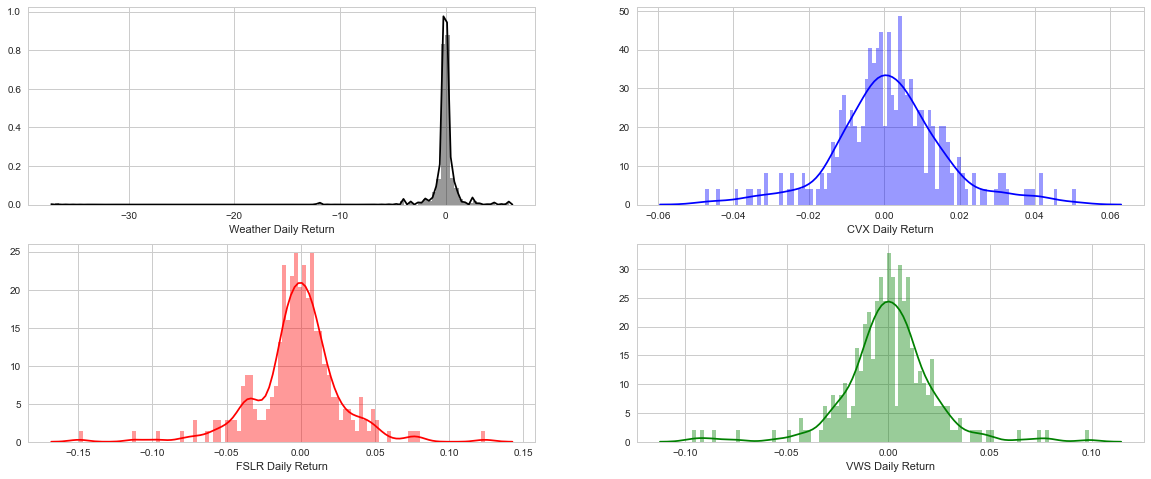

In [84]:
# Now will plot the daily return average using histogram
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(adjClose2016['Weather Daily Return'].dropna(),bins=100,color='black', ax=ax1)
sns.distplot(adjClose2016['CVX Daily Return'].dropna(),bins=100,color='blue', ax=ax2)
sns.distplot(adjClose2016['FSLR Daily Return'].dropna(),bins=100,color='red', ax=ax3)
sns.distplot(adjClose2016['VWS Daily Return'].dropna(),bins=100,color='green', ax=ax4)

### Result from above graph.

- The comparable analyses of the standard deviation of weather, oil, solar and wind reflecting the gradual fall in the stoc kvalue of oil.
    
- while a consistent rise of stocks of solar and wind companies when compared with shifts in temperatures. 

- When the sum of histogram values across the negative and positive deviation are compared, a higher value (solar, wind and temperature) shows a tend towards rising value while a lower value (oil) elucidates a trend against the particular stock.

### Final Conclusion

- Colloquially, nations have pushed for greater utilization of non-renewable energy sources to prevent the environment from distruction which will see the trend followed in the near future.

-  The rise of solar is consistently progressing, wind power consumption as a means to produce energy has shot through the roof.

-  Oil meanwhile has simultaneously regressed.